# April ??th, 2022 (register RABIES)

**Motivation**: ?? <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((128), full_load=True, load_parcel=True, load_allen=True)

In [3]:
from register.register import *
reg = Register(mice)

In [4]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.15, 0.20, 0.25, 0.28, 0.3, 0.31, 0.32, 0.34, 0.35, 0.37, 0.38, 0.39, 0.40, 0.5, 0.9],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [
        0.15,
        0.2,
        0.25,
        0.28,
        0.3,
        0.31,
        0.32,
        0.34,
        0.35,
        0.37,
        0.38,
        0.39,
        0.4,
        0.5,
        0.9
    ],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [69]:
reg.set_mode('bold')
reg.mi_base = None

In [70]:
key = 'sub-SLC09_ses-2'
indiv = mice.T1w[key].load_ants()
indiv *= mice.mask3d[key].load_ants()
indiv = reg._prepare(indiv)

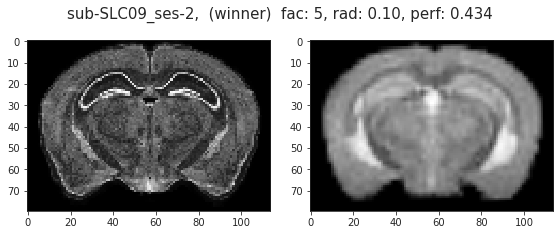

sub-SLC09_ses-2, perf:
seed               5
type             SyN
grad             0.4
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.984801

In [71]:
results = reg.fit_register(
    name=key,
    moving=indiv,
    fixed=reg.nissl,
    save_results=True,
    **kwargs
)

In [72]:
save_obj(results['df'], f"fit-RABIES_{key}_{now()}", tmp_dir, 'df')

[PROGRESS] 'fit_sub-SLC09_ses-2_(2022_01_27).df' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp

'/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/fit_sub-SLC09_ses-2_(2022_01_27).df'

### --- continue from here

In [73]:
df = results['df'].copy()

params = {
    'seed': 5,
    'type': 'SyN', # 'ElasticSyN'
    'grad': 0.4,
    'syn_bin': 32,
    'aff_bin': 13,
    'aff_rate': 0.2,
}
cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)

df_sub_main = df.loc[cond]
df_sub_main

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
118341,5,SyN,0.4,32,13,0.2,mi,0.519319
118342,5,SyN,0.4,32,13,0.2,ovp_MOp,0.984155
118343,5,SyN,0.4,32,13,0.2,sym_MOp,0.968804
118344,5,SyN,0.4,32,13,0.2,ovp_MOs,0.989455
118345,5,SyN,0.4,32,13,0.2,sym_MOs,0.962069
118346,5,SyN,0.4,32,13,0.2,ovp_SS,0.996241
118347,5,SyN,0.4,32,13,0.2,sym_SS,0.990789
118348,5,SyN,0.4,32,13,0.2,ovp_VISC,0.986607
118349,5,SyN,0.4,32,13,0.2,sym_VISC,0.982301
118350,5,SyN,0.4,32,13,0.2,ovp_VIS,0.995912


In [74]:
results['perf']

0.9848013027215972

In [75]:
_df = df.loc[df['metric'] == 'sym']
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
142369,6,ElasticSyN,0.15,64,32,0.6,sym,0.988522


In [76]:
params = dict(_df.iloc[_df['score'].argmax()])
params.pop('metric')
params.pop('score')

cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)
df_sub = df.loc[cond]
df_sub

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
142344,6,ElasticSyN,0.15,64,32,0.6,mi,0.510888
142345,6,ElasticSyN,0.15,64,32,0.6,ovp_MOp,0.984848
142346,6,ElasticSyN,0.15,64,32,0.6,sym_MOp,0.996639
142347,6,ElasticSyN,0.15,64,32,0.6,ovp_MOs,0.988870
142348,6,ElasticSyN,0.15,64,32,0.6,sym_MOs,0.983022
142349,6,ElasticSyN,0.15,64,32,0.6,ovp_SS,0.997777
142350,6,ElasticSyN,0.15,64,32,0.6,sym_SS,0.997225
142351,6,ElasticSyN,0.15,64,32,0.6,ovp_VISC,0.986784
142352,6,ElasticSyN,0.15,64,32,0.6,sym_VISC,0.956897
142353,6,ElasticSyN,0.15,64,32,0.6,ovp_VIS,0.999216


[<matplotlib.lines.Line2D object at 0x7f70083331c0>]

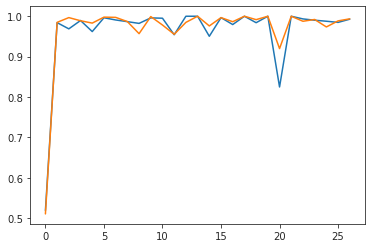

In [77]:
plt.plot(df_sub_main['score'].values)
plt.plot(df_sub['score'].values)

<AxesSubplot:xlabel='score', ylabel='Count'>

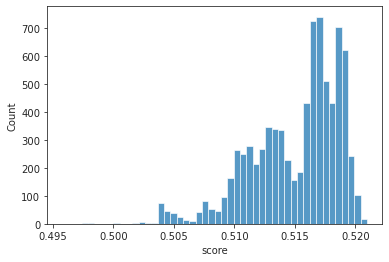

In [78]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])

<AxesSubplot:xlabel='score', ylabel='Count'>

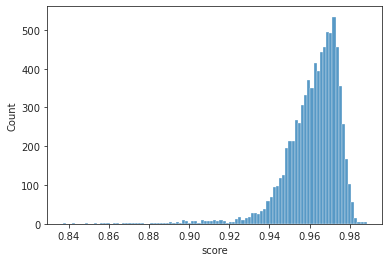

In [79]:
sns.histplot(df.loc[df['metric'] == 'sym', 'score'])

<AxesSubplot:>

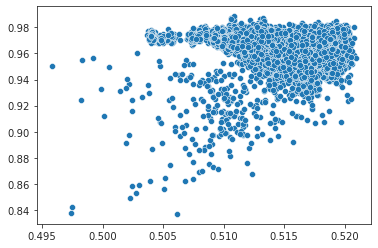

In [80]:
sns.scatterplot(
    x=df.loc[df['metric'] == 'mi', 'score'].values,
    y=df.loc[df['metric'] == 'sym', 'score'].values,
)

## Kaba continues

In [5]:
self = reg

In [6]:
tx, tx_aff = self.load_tx(self.in_house_name)

In [7]:
tx

[
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.mat',
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.nii.gz'
]

In [8]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [9]:
affined = tx_aff.apply_to_image(
    image=self.in_house,
    reference=self.nissl,
    interpolation='linear',
)
_ = self._apply_tx_obj2lps(
    name=self.in_house_name,
    moving=affined,
    moving_orig=self.in_house,
    tx_aff=tx_aff,
    tx=tx,
    use_mm=True,
    save_results=True,
)

In [82]:
import fnmatch

## Check previous performance

In [97]:
def _bst_tx(name, df_tx, mi_q, verbose=False):
    mi = df_tx.loc[df_tx['metric'] == 'mi']
    sym = df_tx.loc[df_tx['metric'] == 'sym']
    mi = mi.reset_index(drop=True)
    sym = sym.reset_index(drop=True)
    cond = mi['score'] > np.nanquantile(mi['score'], mi_q)
    _df = sym.loc[cond]
    try:
        best_params = _df.iloc[_df['score'].argmax()]
    except ValueError:
        cond = mi['score'] > np.nanquantile(mi['score'], 2 * mi_q / 3)
        _df = sym.loc[cond]
        best_params = _df.iloc[_df['score'].argmax()]
    best_params = best_params.drop(['metric', 'score'])
    best_params = dict(best_params)
    best_tx_id = _mk_tx_string(
        seed=best_params['seed'],
        t=best_params['type'],
        g=best_params['grad'],
        syn=best_params['syn_bin'],
        aff=best_params['aff_bin'],
        r=best_params['aff_rate'],
    )
    cond = functools.reduce(
        lambda x, y: x & y, [
            df_tx[k] == v for k, v
            in best_params.items()
        ],
    )
    _df = df_tx.loc[cond]
    if verbose:
        msg = f"{name}, perf:\n\n"
        msg += f"{_df.to_string(index=False)}\n"
        print(msg)
    return best_params, _df

In [98]:
pth = '/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/transforms_backup'
file_names = {}
for key in mice.T1w:
    candidates = fnmatch.filter(
        os.listdir(pth),
        f"fit_{key}_(*).df",
    )
    if not len(candidates):
        continue
    file_names[key] = candidates.pop()

In [99]:
dlist = []
for key, name in file_names.items():
    df_tx = pd.read_pickle(pjoin(pth, name))
    for q in [0.5, 0.6, 0.75, 0.8, 0.9, 0.95]:
        best_params, _df = _bst_tx(key, df_tx, q, False)
        mi = _df.loc[_df['metric'] == 'mi', 'score'].item()
        sym = _df.loc[_df['metric'] == 'sym', 'score'].item()
        data = {
            'mi': mi,
            'sym': sym,
            **best_params,
        }
        dlist.append({
            'key': [key] * len(data),
            'q': [q] * len(data),
            'label': data.keys(),
            'value': data.values(),
        })
df_final = pd.DataFrame(merge_dicts(dlist))

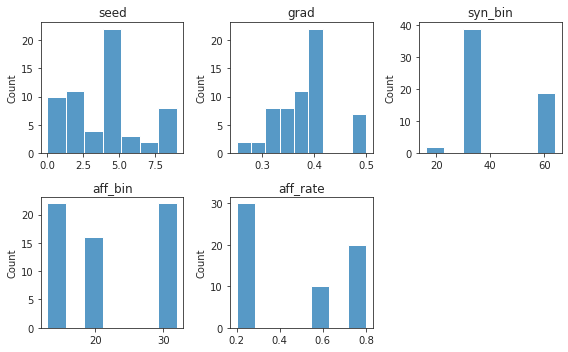

In [110]:
fig, axes = create_figure(2, 3, (8, 5))
trim_axs(axes, 5)
for ax, item in zip(axes.flat, ['seed', 'grad', 'syn_bin', 'aff_bin', 'aff_rate']):
    sns.histplot(df_final.loc[df_final['label'] == item, 'value'].values.tolist(), ax=ax)
    ax.set_title(item)

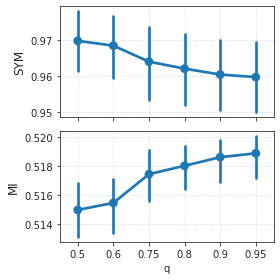

In [125]:
fig, axes = create_figure(2, 1, (4, 4), sharex='all')
sns.pointplot(data=df_final.loc[df_final['label'] == 'sym'], x='q', y='value', ax=axes[0])
sns.pointplot(data=df_final.loc[df_final['label'] == 'mi'], x='q', y='value', ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('SYM', fontsize=12)
axes[1].set_ylabel('MI', fontsize=12)
add_grid(axes)
plt.show()

In [126]:
q = 0.75
for key, name in file_names.items():
    df_tx = pd.read_pickle(pjoin(pth, name))
    _ = _bst_tx(key, df_tx, q, True)

sub-SLC01_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    3 ElasticSyN   0.4       32       13       0.2       mi 0.517980
    3 ElasticSyN   0.4       32       13       0.2  ovp_MOp 0.986805
    3 ElasticSyN   0.4       32       13       0.2  sym_MOp 0.998117
    3 ElasticSyN   0.4       32       13       0.2  ovp_MOs 0.979574
    3 ElasticSyN   0.4       32       13       0.2  sym_MOs 0.994907
    3 ElasticSyN   0.4       32       13       0.2   ovp_SS 0.996749
    3 ElasticSyN   0.4       32       13       0.2   sym_SS 0.987082
    3 ElasticSyN   0.4       32       13       0.2 ovp_VISC 0.991561
    3 ElasticSyN   0.4       32       13       0.2 sym_VISC 0.942623
    3 ElasticSyN   0.4       32       13       0.2  ovp_VIS 0.997300
    3 ElasticSyN   0.4       32       13       0.2  sym_VIS 0.987478
    3 ElasticSyN   0.4       32       13       0.2   ovp_AI 0.924222
    3 ElasticSyN   0.4       32       13       0.2   sym_AI 0.955026
    3 ElasticSyN   0.4       32       13       0.2 ovp_PTLp 1.000000
    3 ElasticSyN   0.4       32       13       0.2 sym_PTLp 0.982609
    3 ElasticSyN   0.4       32       13       0.2  ovp_TEa 1.000000
    3 ElasticSyN   0.4       32       13       0.2  sym_TEa 0.952703
    3 ElasticSyN   0.4       32       13       0.2  ovp_CA1 1.000000
    3 ElasticSyN   0.4       32       13       0.2  sym_CA1 0.877698
    3 ElasticSyN   0.4       32       13       0.2  ovp_CLA 1.000000
    3 ElasticSyN   0.4       32       13       0.2  sym_CLA 0.968750
    3 ElasticSyN   0.4       32       13       0.2 ovp_STRd 1.000000
    3 ElasticSyN   0.4       32       13       0.2 sym_STRd 0.977569
    3 ElasticSyN   0.4       32       13       0.2  ovp_iso 0.987167
    3 ElasticSyN   0.4       32       13       0.2  sym_iso 0.998685
    3 ElasticSyN   0.4       32       13       0.2      sym 0.973975
    3 ElasticSyN   0.4       32       13       0.2      ovp 0.990478

sub-SLC02_ses-2, perf:

 seed     type  grad  syn_bin  aff_bin  aff_rate   metric    score
    0 SyNAggro   0.5       32       32       0.8       mi 0.521277
    0 SyNAggro   0.5       32       32       0.8  ovp_MOp 0.994361
    0 SyNAggro   0.5       32       32       0.8  sym_MOp 0.903399
    0 SyNAggro   0.5       32       32       0.8  ovp_MOs 1.000000
    0 SyNAggro   0.5       32       32       0.8  sym_MOs 0.884354
    0 SyNAggro   0.5       32       32       0.8   ovp_SS 0.999030
    0 SyNAggro   0.5       32       32       0.8   sym_SS 0.976982
    0 SyNAggro   0.5       32       32       0.8 ovp_VISC 0.995392
    0 SyNAggro   0.5       32       32       0.8 sym_VISC 0.838983
    0 SyNAggro   0.5       32       32       0.8  ovp_VIS 0.999026
    0 SyNAggro   0.5       32       32       0.8  sym_VIS 0.934087
    0 SyNAggro   0.5       32       32       0.8   ovp_AI 0.974684
    0 SyNAggro   0.5       32       32       0.8   sym_AI 0.975000
    0 SyNAggro   0.5       32       32       0.8 ovp_PTLp 1.000000
    0 SyNAggro   0.5       32       32       0.8 sym_PTLp 0.962617
    0 SyNAggro   0.5       32       32       0.8  ovp_TEa 1.000000
    0 SyNAggro   0.5       32       32       0.8  sym_TEa 0.969925
    0 SyNAggro   0.5       32       32       0.8  ovp_CA1 1.000000
    0 SyNAggro   0.5       32       32       0.8  sym_CA1 0.876923
    0 SyNAggro   0.5       32       32       0.8  ovp_CLA 1.000000
    0 SyNAggro   0.5       32       32       0.8  sym_CLA 0.968750
    0 SyNAggro   0.5       32       32       0.8 ovp_STRd 1.000000
    0 SyNAggro   0.5       32       32       0.8 sym_STRd 0.955438
    0 SyNAggro   0.5       32       32       0.8  ovp_iso 0.995524
    0 SyNAggro   0.5       32       32       0.8  sym_iso 0.995971
    0 SyNAggro   0.5       32       32       0.8      sym 0.939692
    0 SyNAggro   0.5       32       32       0.8      ovp 0.997416

sub-SLC03_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    1  SyN  0.32       32       32       0.8       mi 0.518391
    1  SyN  0.32       32       32       0.8  ovp_MOp 0.984875
    1  SyN  0.32       32       32       0.8  sym_MOp 0.965035
    1  SyN  0.32       32       32       0.8  ovp_MOs 0.992952
    1  SyN  0.32       32       32       0.8  sym_MOs 0.956897
    1  SyN  0.32       32       32       0.8   ovp_SS 0.996320
    1  SyN  0.32       32       32       0.8   sym_SS 0.993276
    1  SyN  0.32       32       32       0.8 ovp_VISC 1.000000
    1  SyN  0.32       32       32       0.8 sym_VISC 0.918033
    1  SyN  0.32       32       32       0.8  ovp_VIS 1.000000
    1  SyN  0.32       32       32       0.8  sym_VIS 0.991197
    1  SyN  0.32       32       32       0.8   ovp_AI 0.951187
    1  SyN  0.32       32       32       0.8   sym_AI 0.968831
    1  SyN  0.32       32       32       0.8 ovp_PTLp 1.000000
    1  SyN  0.32       32       32       0.8 sym_PTLp 0.972222
    1  SyN  0.32       32       32       0.8  ovp_TEa 1.000000
    1  SyN  0.32       32       32       0.8  sym_TEa 0.812500
    1  SyN  0.32       32       32       0.8  ovp_CA1 1.000000
    1  SyN  0.32       32       32       0.8  sym_CA1 0.853933
    1  SyN  0.32       32       32       0.8  ovp_CLA 1.000000
    1  SyN  0.32       32       32       0.8  sym_CLA 0.852941
    1  SyN  0.32       32       32       0.8 ovp_STRd 1.000000
    1  SyN  0.32       32       32       0.8 sym_STRd 0.998595
    1  SyN  0.32       32       32       0.8  ovp_iso 0.990354
    1  SyN  0.32       32       32       0.8  sym_iso 0.975729
    1  SyN  0.32       32       32       0.8      sym 0.967621
    1  SyN  0.32       32       32       0.8      ovp 0.993771

sub-SLC04_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    2  SyN   0.4       32       32       0.2       mi 0.520228
    2  SyN   0.4       32       32       0.2  ovp_MOp 0.986339
    2  SyN   0.4       32       32       0.2  sym_MOp 0.978378
    2  SyN   0.4       32       32       0.2  ovp_MOs 0.991071
    2  SyN   0.4       32       32       0.2  sym_MOs 0.975309
    2  SyN   0.4       32       32       0.2   ovp_SS 0.998333
    2  SyN   0.4       32       32       0.2   sym_SS 0.995011
    2  SyN   0.4       32       32       0.2 ovp_VISC 0.996183
    2  SyN   0.4       32       32       0.2 sym_VISC 0.912409
    2  SyN   0.4       32       32       0.2  ovp_VIS 0.998298
    2  SyN   0.4       32       32       0.2  sym_VIS 0.998299
    2  SyN   0.4       32       32       0.2   ovp_AI 0.953518
    2  SyN   0.4       32       32       0.2   sym_AI 1.000000
    2  SyN   0.4       32       32       0.2 ovp_PTLp 1.000000
    2  SyN   0.4       32       32       0.2 sym_PTLp 0.909836
    2  SyN   0.4       32       32       0.2  ovp_TEa 1.000000
    2  SyN   0.4       32       32       0.2  sym_TEa 0.882716
    2  SyN   0.4       32       32       0.2  ovp_CA1 1.000000
    2  SyN   0.4       32       32       0.2  sym_CA1 0.895592
    2  SyN   0.4       32       32       0.2  ovp_CLA 1.000000
    2  SyN   0.4       32       32       0.2  sym_CLA 0.875000
    2  SyN   0.4       32       32       0.2 ovp_STRd 1.000000
    2  SyN   0.4       32       32       0.2 sym_STRd 0.975626
    2  SyN   0.4       32       32       0.2  ovp_iso 0.991591
    2  SyN   0.4       32       32       0.2  sym_iso 0.971996
    2  SyN   0.4       32       32       0.2      sym 0.973157
    2  SyN   0.4       32       32       0.2      ovp 0.994138

sub-SLC05_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    1 ElasticSyN   0.4       64       13       0.8       mi 0.515763
    1 ElasticSyN   0.4       64       13       0.8  ovp_MOp 0.998208
    1 ElasticSyN   0.4       64       13       0.8  sym_MOp 0.968254
    1 ElasticSyN   0.4       64       13       0.8  ovp_MOs 0.996546
    1 ElasticSyN   0.4       64       13       0.8  sym_MOs 0.976109
    1 ElasticSyN   0.4       64       13       0.8   ovp_SS 0.999405
    1 ElasticSyN   0.4       64       13       0.8   sym_SS 0.998811
    1 ElasticSyN   0.4       64       13       0.8 ovp_VISC 0.995671
    1 ElasticSyN   0.4       64       13       0.8 sym_VISC 0.991379
    1 ElasticSyN   0.4       64       13       0.8  ovp_VIS 1.000000
    1 ElasticSyN   0.4       64       13       0.8  sym_VIS 1.000000
    1 ElasticSyN   0.4       64       13       0.8   ovp_AI 0.962343
    1 ElasticSyN   0.4       64       13       0.8   sym_AI 0.953678
    1 ElasticSyN   0.4       64       13       0.8 ovp_PTLp 1.000000
    1 ElasticSyN   0.4       64       13       0.8 sym_PTLp 1.000000
    1 ElasticSyN   0.4       64       13       0.8  ovp_TEa 1.000000
    1 ElasticSyN   0.4       64       13       0.8  sym_TEa 0.868421
    1 ElasticSyN   0.4       64       13       0.8  ovp_CA1 1.000000
    1 ElasticSyN   0.4       64       13       0.8  sym_CA1 0.994924
    1 ElasticSyN   0.4       64       13       0.8  ovp_CLA 1.000000
    1 ElasticSyN   0.4       64       13       0.8  sym_CLA 0.852941
    1 ElasticSyN   0.4       64       13       0.8 ovp_STRd 1.000000
    1 ElasticSyN   0.4       64       13       0.8 sym_STRd 0.933613
    1 ElasticSyN   0.4       64       13       0.8  ovp_iso 0.995541
    1 ElasticSyN   0.4       64       13       0.8  sym_iso 0.989159
    1 ElasticSyN   0.4       64       13       0.8      sym 0.972820
    1 ElasticSyN   0.4       64       13       0.8      ovp 0.996831

sub-SLC06_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    9 ElasticSyN  0.39       32       20       0.2       mi 0.511201
    9 ElasticSyN  0.39       32       20       0.2  ovp_MOp 0.993924
    9 ElasticSyN  0.39       32       20       0.2  sym_MOp 0.945946
    9 ElasticSyN  0.39       32       20       0.2  ovp_MOs 0.991756
    9 ElasticSyN  0.39       32       20       0.2  sym_MOs 0.995066
    9 ElasticSyN  0.39       32       20       0.2   ovp_SS 0.998660
    9 ElasticSyN  0.39       32       20       0.2   sym_SS 0.977731
    9 ElasticSyN  0.39       32       20       0.2 ovp_VISC 1.000000
    9 ElasticSyN  0.39       32       20       0.2 sym_VISC 0.950820
    9 ElasticSyN  0.39       32       20       0.2  ovp_VIS 1.000000
    9 ElasticSyN  0.39       32       20       0.2  sym_VIS 0.926829
    9 ElasticSyN  0.39       32       20       0.2   ovp_AI 0.932115
    9 ElasticSyN  0.39       32       20       0.2   sym_AI 0.994792
    9 ElasticSyN  0.39       32       20       0.2 ovp_PTLp 1.000000
    9 ElasticSyN  0.39       32       20       0.2 sym_PTLp 0.941667
    9 ElasticSyN  0.39       32       20       0.2  ovp_TEa 1.000000
    9 ElasticSyN  0.39       32       20       0.2  sym_TEa 0.993902
    9 ElasticSyN  0.39       32       20       0.2  ovp_CA1 1.000000
    9 ElasticSyN  0.39       32       20       0.2  sym_CA1 0.980769
    9 ElasticSyN  0.39       32       20       0.2  ovp_CLA 1.000000
    9 ElasticSyN  0.39       32       20       0.2  sym_CLA 0.939394
    9 ElasticSyN  0.39       32       20       0.2 ovp_STRd 1.000000
    9 ElasticSyN  0.39       32       20       0.2 sym_STRd 0.929539
    9 ElasticSyN  0.39       32       20       0.2  ovp_iso 0.991342
    9 ElasticSyN  0.39       32       20       0.2  sym_iso 0.973835
    9 ElasticSyN  0.39       32       20       0.2      sym 0.961329
    9 ElasticSyN  0.39       32       20       0.2      ovp 0.993889

sub-SLC07_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    5 ElasticSyN  0.38       32       32       0.2       mi 0.519927
    5 ElasticSyN  0.38       32       32       0.2  ovp_MOp 0.985809
    5 ElasticSyN  0.38       32       32       0.2  sym_MOp 0.998110
    5 ElasticSyN  0.38       32       32       0.2  ovp_MOs 0.989160
    5 ElasticSyN  0.38       32       32       0.2  sym_MOs 0.921875
    5 ElasticSyN  0.38       32       32       0.2   ovp_SS 0.995074
    5 ElasticSyN  0.38       32       32       0.2   sym_SS 0.997540
    5 ElasticSyN  0.38       32       32       0.2 ovp_VISC 0.995434
    5 ElasticSyN  0.38       32       32       0.2 sym_VISC 0.955357
    5 ElasticSyN  0.38       32       32       0.2  ovp_VIS 1.000000
    5 ElasticSyN  0.38       32       32       0.2  sym_VIS 0.993115
    5 ElasticSyN  0.38       32       32       0.2   ovp_AI 0.948579
    5 ElasticSyN  0.38       32       32       0.2   sym_AI 0.986559
    5 ElasticSyN  0.38       32       32       0.2 ovp_PTLp 1.000000
    5 ElasticSyN  0.38       32       32       0.2 sym_PTLp 0.964602
    5 ElasticSyN  0.38       32       32       0.2  ovp_TEa 1.000000
    5 ElasticSyN  0.38       32       32       0.2  sym_TEa 0.978417
    5 ElasticSyN  0.38       32       32       0.2  ovp_CA1 1.000000
    5 ElasticSyN  0.38       32       32       0.2  sym_CA1 0.833333
    5 ElasticSyN  0.38       32       32       0.2  ovp_CLA 1.000000
    5 ElasticSyN  0.38       32       32       0.2  sym_CLA 0.918919
    5 ElasticSyN  0.38       32       32       0.2 ovp_STRd 1.000000
    5 ElasticSyN  0.38       32       32       0.2 sym_STRd 0.916667
    5 ElasticSyN  0.38       32       32       0.2  ovp_iso 0.988486
    5 ElasticSyN  0.38       32       32       0.2  sym_iso 0.984600
    5 ElasticSyN  0.38       32       32       0.2      sym 0.955532
    5 ElasticSyN  0.38       32       32       0.2      ovp 0.992868

sub-SLC08_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    1 ElasticSyN   0.4       64       32       0.2       mi 0.513367
    1 ElasticSyN   0.4       64       32       0.2  ovp_MOp 0.991259
    1 ElasticSyN   0.4       64       32       0.2  sym_MOp 0.945578
    1 ElasticSyN   0.4       64       32       0.2  ovp_MOs 0.992537
    1 ElasticSyN   0.4       64       32       0.2  sym_MOs 0.967374
    1 ElasticSyN   0.4       64       32       0.2   ovp_SS 0.997749
    1 ElasticSyN   0.4       64       32       0.2   sym_SS 0.982153
    1 ElasticSyN   0.4       64       32       0.2 ovp_VISC 1.000000
    1 ElasticSyN   0.4       64       32       0.2 sym_VISC 0.810345
    1 ElasticSyN   0.4       64       32       0.2  ovp_VIS 0.998332
    1 ElasticSyN   0.4       64       32       0.2  sym_VIS 0.985099
    1 ElasticSyN   0.4       64       32       0.2   ovp_AI 0.941176
    1 ElasticSyN   0.4       64       32       0.2   sym_AI 0.963255
    1 ElasticSyN   0.4       64       32       0.2 ovp_PTLp 1.000000
    1 ElasticSyN   0.4       64       32       0.2 sym_PTLp 0.975610
    1 ElasticSyN   0.4       64       32       0.2  ovp_TEa 1.000000
    1 ElasticSyN   0.4       64       32       0.2  sym_TEa 0.869281
    1 ElasticSyN   0.4       64       32       0.2  ovp_CA1 1.000000
    1 ElasticSyN   0.4       64       32       0.2  sym_CA1 0.743304
    1 ElasticSyN   0.4       64       32       0.2  ovp_CLA 1.000000
    1 ElasticSyN   0.4       64       32       0.2  sym_CLA 0.764706
    1 ElasticSyN   0.4       64       32       0.2 ovp_STRd 1.000000
    1 ElasticSyN   0.4       64       32       0.2 sym_STRd 0.903673
    1 ElasticSyN   0.4       64       32       0.2  ovp_iso 0.991878
    1 ElasticSyN   0.4       64       32       0.2  sym_iso 0.991595
    1 ElasticSyN   0.4       64       32       0.2      sym 0.932865
    1 ElasticSyN   0.4       64       32       0.2      ovp 0.993878

sub-SLC09_ses-2, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    5  SyN   0.4       32       13       0.2       mi 0.519319
    5  SyN   0.4       32       13       0.2  ovp_MOp 0.984155
    5  SyN   0.4       32       13       0.2  sym_MOp 0.968804
    5  SyN   0.4       32       13       0.2  ovp_MOs 0.989455
    5  SyN   0.4       32       13       0.2  sym_MOs 0.962069
    5  SyN   0.4       32       13       0.2   ovp_SS 0.996241
    5  SyN   0.4       32       13       0.2   sym_SS 0.990789
    5  SyN   0.4       32       13       0.2 ovp_VISC 0.986607
    5  SyN   0.4       32       13       0.2 sym_VISC 0.982301
    5  SyN   0.4       32       13       0.2  ovp_VIS 0.995912
    5  SyN   0.4       32       13       0.2  sym_VIS 0.995106
    5  SyN   0.4       32       13       0.2   ovp_AI 0.954208
    5  SyN   0.4       32       13       0.2   sym_AI 1.000000
    5  SyN   0.4       32       13       0.2 ovp_PTLp 1.000000
    5  SyN   0.4       32       13       0.2 sym_PTLp 0.950413
    5  SyN   0.4       32       13       0.2  ovp_TEa 0.996540
    5  SyN   0.4       32       13       0.2  sym_TEa 0.979452
    5  SyN   0.4       32       13       0.2  ovp_CA1 1.000000
    5  SyN   0.4       32       13       0.2  sym_CA1 0.984018
    5  SyN   0.4       32       13       0.2  ovp_CLA 1.000000
    5  SyN   0.4       32       13       0.2  sym_CLA 0.825000
    5  SyN   0.4       32       13       0.2 ovp_STRd 1.000000
    5  SyN   0.4       32       13       0.2 sym_STRd 0.993377
    5  SyN   0.4       32       13       0.2  ovp_iso 0.990201
    5  SyN   0.4       32       13       0.2  sym_iso 0.987648
    5  SyN   0.4       32       13       0.2      sym 0.984801
    5  SyN   0.4       32       13       0.2      ovp 0.992719

sub-SLC10_ses-2, perf:

 seed       type  grad  syn_bin  aff_bin  aff_rate   metric    score
    4 ElasticSyN  0.32       32       20       0.6       mi 0.517166
    4 ElasticSyN  0.32       32       20       0.6  ovp_MOp 0.983209
    4 ElasticSyN  0.32       32       20       0.6  sym_MOp 0.992565
    4 ElasticSyN  0.32       32       20       0.6  ovp_MOs 0.994590
    4 ElasticSyN  0.32       32       20       0.6  sym_MOs 0.991023
    4 ElasticSyN  0.32       32       20       0.6   ovp_SS 0.998811
    4 ElasticSyN  0.32       32       20       0.6   sym_SS 0.995848
    4 ElasticSyN  0.32       32       20       0.6 ovp_VISC 0.995671
    4 ElasticSyN  0.32       32       20       0.6 sym_VISC 0.957627
    4 ElasticSyN  0.32       32       20       0.6  ovp_VIS 1.000000
    4 ElasticSyN  0.32       32       20       0.6  sym_VIS 1.000000
    4 ElasticSyN  0.32       32       20       0.6   ovp_AI 0.952314
    4 ElasticSyN  0.32       32       20       0.6   sym_AI 0.975069
    4 ElasticSyN  0.32       32       20       0.6 ovp_PTLp 1.000000
    4 ElasticSyN  0.32       32       20       0.6 sym_PTLp 0.909091
    4 ElasticSyN  0.32       32       20       0.6  ovp_TEa 1.000000
    4 ElasticSyN  0.32       32       20       0.6  sym_TEa 0.936170
    4 ElasticSyN  0.32       32       20       0.6  ovp_CA1 1.000000
    4 ElasticSyN  0.32       32       20       0.6  sym_CA1 0.994652
    4 ElasticSyN  0.32       32       20       0.6  ovp_CLA 1.000000
    4 ElasticSyN  0.32       32       20       0.6  sym_CLA 0.970588
    4 ElasticSyN  0.32       32       20       0.6 ovp_STRd 1.000000
    4 ElasticSyN  0.32       32       20       0.6 sym_STRd 0.942737
    4 ElasticSyN  0.32       32       20       0.6  ovp_iso 0.992063
    4 ElasticSyN  0.32       32       20       0.6  sym_iso 0.986533
    4 ElasticSyN  0.32       32       20       0.6      sym 0.978856
    4 ElasticSyN  0.32       32       20       0.6      ovp 0.994449